Constructing a Polynomial Regression: An Example

[[-4.01599903e+01]
 [-7.26669255e+00]
 [-9.91095623e+00]
 [-1.02088515e+02]
 [-5.94605843e+01]
 [ 1.90951841e+01]
 [-6.84437425e+00]
 [-7.44344454e+00]
 [ 5.69902754e-01]
 [ 1.25614597e+00]
 [ 1.18119716e+00]
 [-2.04062481e+01]
 [-6.03844257e+00]
 [ 1.20414463e+00]
 [-3.87983086e+00]
 [-1.09109686e+00]
 [-2.26106389e+01]
 [-5.58512209e+00]
 [-1.75069300e+00]
 [ 1.01807609e+01]
 [ 2.71766978e+02]
 [-6.26209271e+00]
 [-3.50705105e+00]
 [ 7.22862289e+00]
 [-1.11767783e+02]
 [ 5.07539155e+01]
 [-6.15063398e+00]
 [ 3.90119652e-01]
 [-2.58553249e+01]
 [-2.27653682e+01]
 [-6.67904878e+00]
 [-1.69078077e+00]
 [ 6.85334133e+00]
 [ 1.29383897e+02]
 [-6.29337309e+00]
 [-2.33324454e+00]
 [-1.10963385e+01]
 [-1.24733692e+01]
 [-2.83930957e+00]
 [-7.99065208e+00]
 [ 1.28391528e+01]
 [ 4.88620326e+01]
 [ 8.36455362e+01]
 [-6.32131295e+01]
 [ 4.74531296e+00]
 [-6.18651630e-01]
 [ 2.91730904e+01]
 [-2.20871404e-01]
 [ 6.64020618e+01]
 [-6.48566689e+00]
 [ 9.01914717e+00]
 [ 1.86610067e+00]
 [-4.6190996

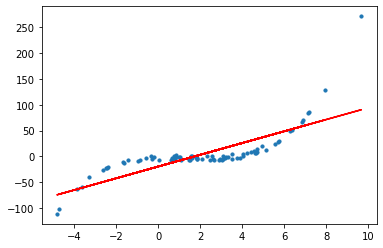

In [32]:
#Linear Regression 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Building a Dummy Dataset:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data 
x = x[:, np.newaxis]
# print(x)
y = y[:, np.newaxis]
print(y)

#spliting the data [80:20]
x_train = x[:-20]
y_train = y[:-20]

x_test = x[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_train, y_train)
print("Model weights: ")
print(model.coef_)

#here, we call predict on the training set because we want to see the fit of the model on the training set. 
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_train_pred, color='r')
plt.show()


Original Features for the first observation: [x]
[-3.29215704]
Polynomial Features: [1,x,x**2]
[ 1.         -3.29215704 10.83829796]
Model weights: 
[[0.         7.22599268 1.0992131 ]]

Training RMSE: 24.395169585394573
Training R2: 0.696595238721916

Test RMSE: 18.958147188630619
Test R2: 0.312829511125536


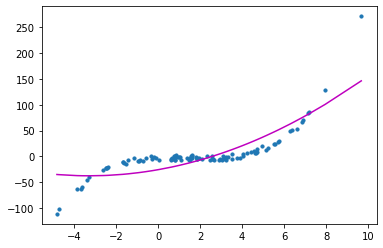

In [33]:
#Constructing a 2nd order Polynomail Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Using the same Dummy Dataset
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
print('Original Features for the first observation: [x]')
print(x[0])

#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. For example, 
## if an input sample is two dimensional and of the form [a, b], 
## the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

polynomial_features= PolynomialFeatures(degree=2)

# The fit method is calculating the mean and variance of each of the input features 
# present in our data. The transform method is transforming all the features using 
# the respective mean and variance.

x_poly = polynomial_features.fit_transform(x) 
print('Polynomial Features: [1,x,x**2]')
print(x_poly[0])

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)


print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()


Original Features: [x]
[-3.29215704]
Polynomial Features: [1,x,x**2,x**3]
[  1.          -3.29215704  10.83829796 -35.68137892]
Model weights: 
[[ 0.          0.90216542 -2.01095101  0.50074037]]

Training RMSE: 2.991353849540036
Training R2: 0.995438052457929

Test RMSE: 3.431740027623186
Test R2: 0.977483469140174


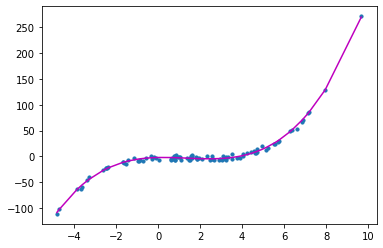

In [36]:
#Polynomail Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Using the same Dummy Dataset
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
print('Original Features: [x]')
print(x[0])

#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
print('Polynomial Features: [1,x,x**2,x**3]')
print(x_poly[0])

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()

Model weights: 
[[-1.33601234e-10 -9.86287928e-10  1.56760543e-12  1.17791265e-14
  -2.20254400e-14  1.14518059e-13 -2.39702893e-13  1.05940748e-12
  -2.53463416e-12  8.98714696e-12 -2.62308040e-11  6.64643418e-11
  -2.53559979e-10  4.13906900e-10 -2.01496809e-09  2.42200003e-09
  -9.68596803e-09  1.53252510e-08 -4.69480938e-09 -4.50296094e-10
   3.97561816e-10 -4.55547376e-11 -4.82654557e-12  1.49601056e-12
  -1.22762330e-13  3.49919072e-15]]

Training RMSE: 6.565716254129361
Training R2: 0.978022467587639

Test RMSE: 9.442464190858150
Test R2: 0.829531785795710


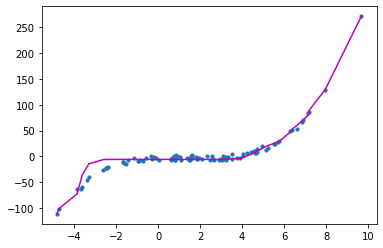

In [37]:
#Polynomail Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Using the same Dummy Dataset
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=25)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()


